In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from wrangle import clean_and_convert, train_val_test
from explore import plot_variable_pairs, hypothesis_test, plot_categorical_and_continuous_vars, different_plots

# Exploration

In [2]:
df = clean_and_convert()
df.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,bedrooms_bin,bathrooms_bin,squarefeet_bin,decades
4,4,2,3633,296425,2005,6941,6037,6,3,4000,2010
6,3,4,1620,847770,2011,10244,6037,4,7,2000,2020
7,3,2,2077,646760,1926,7924,6037,4,3,2500,1930
11,0,0,1200,5328,1972,91,6037,2,1,1500,1980
14,0,0,171,6920,1973,255,6037,2,1,500,1980


In [3]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((1477408, 11), (316588, 11), (316588, 11))

### 3) 
Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


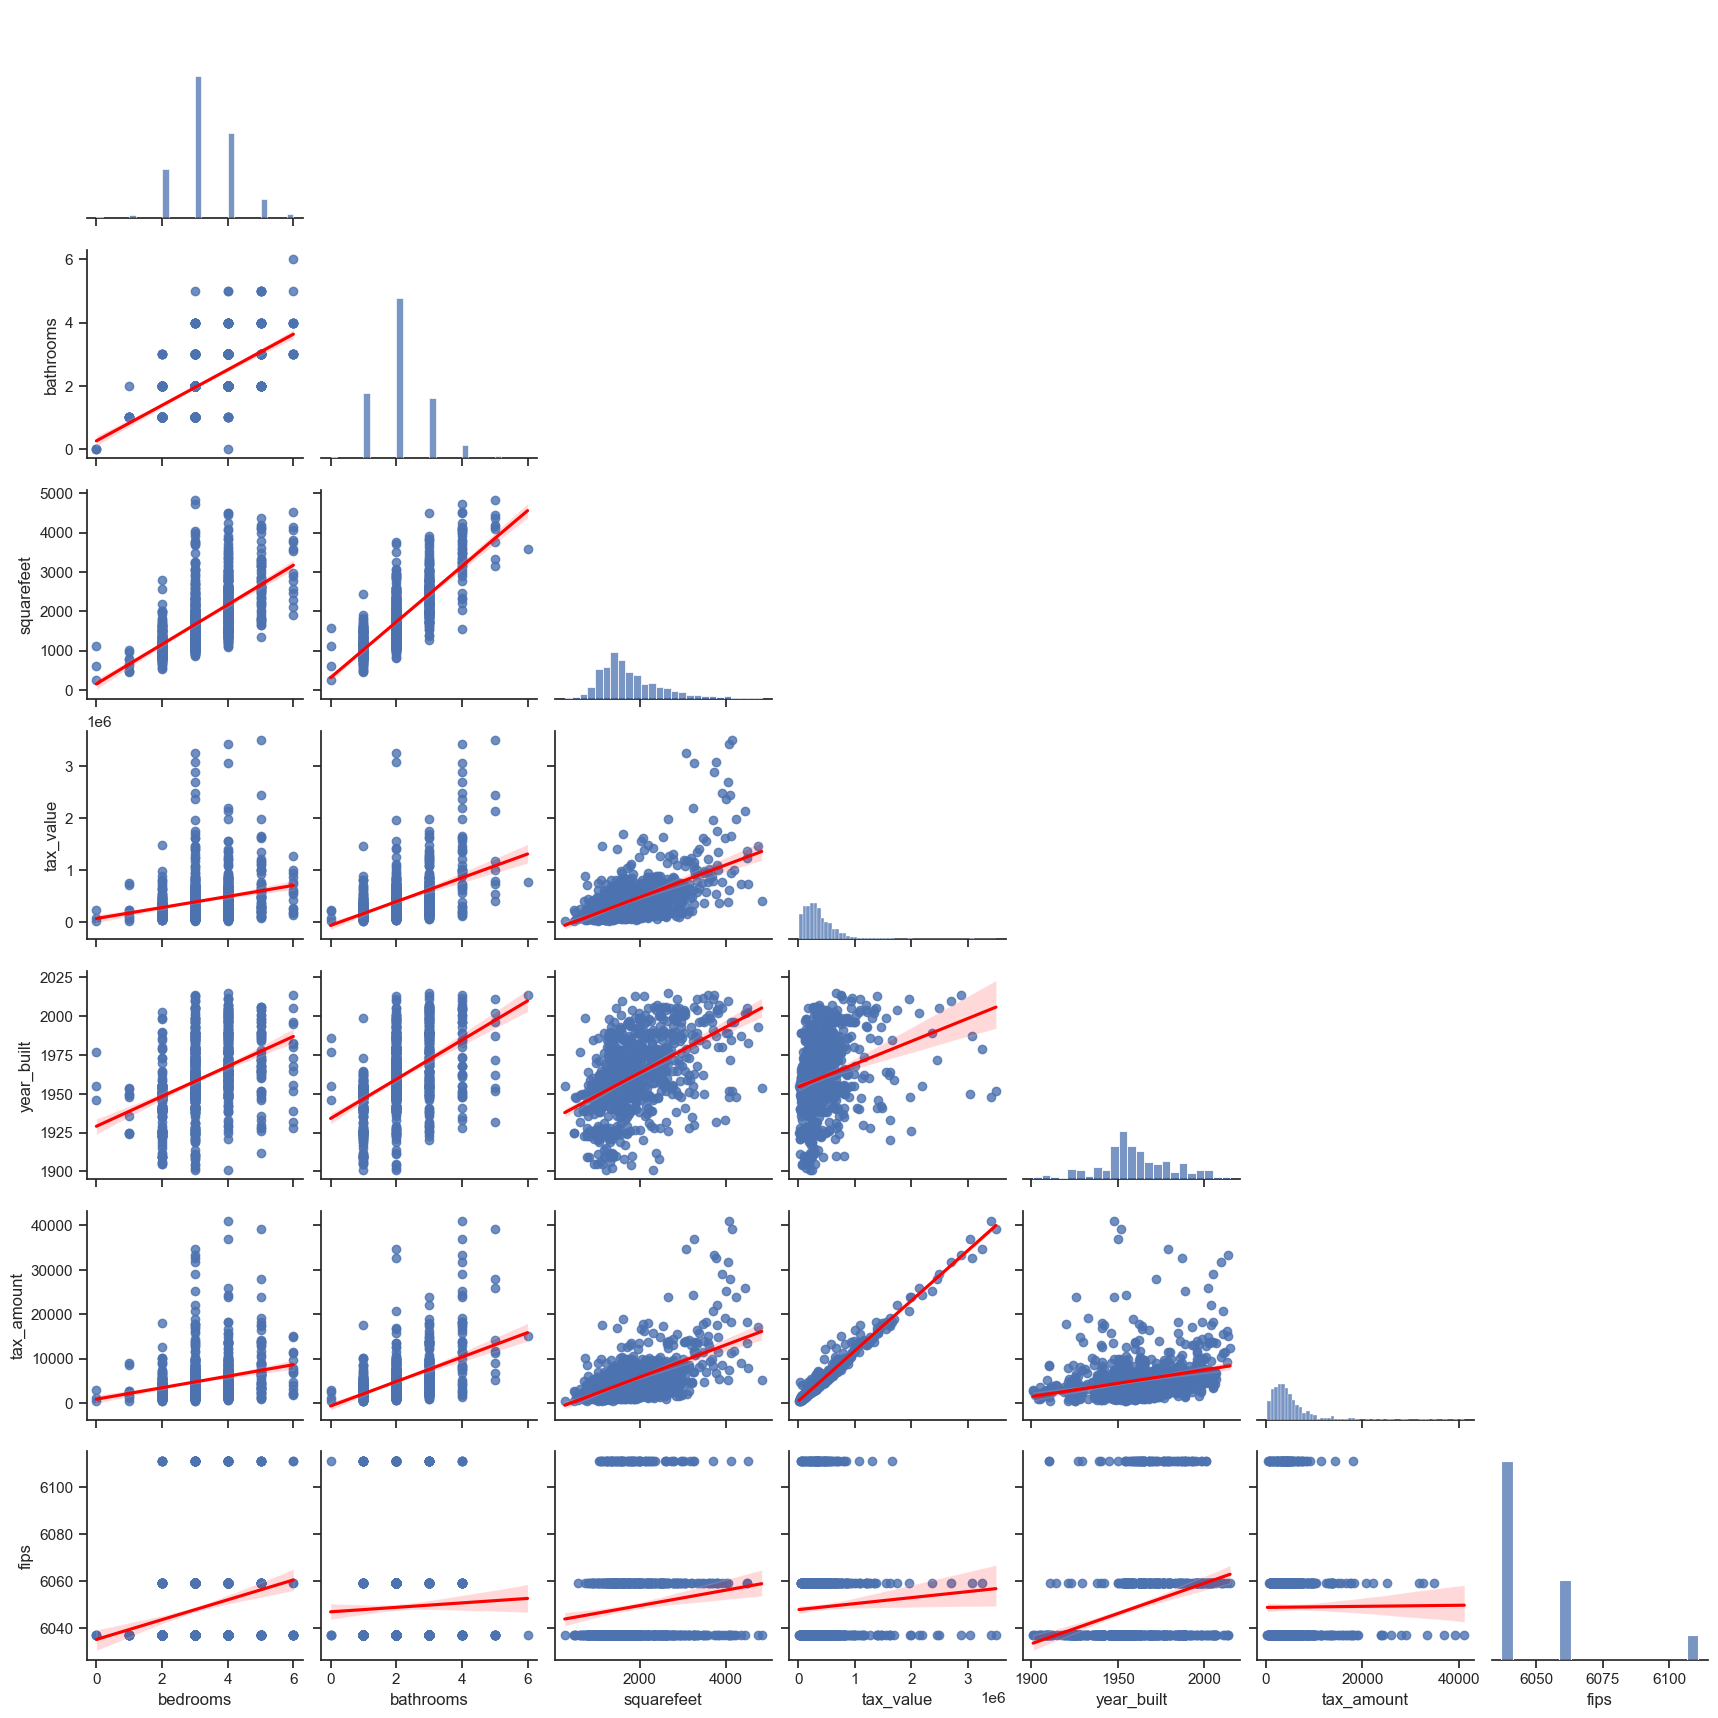

In [4]:
plot_variable_pairs(train) 

### 4) 
Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

### 5) 
Save the functions you have written to create visualizations in your explore.py file.  
   Rewrite your notebook code so that you are using the functions imported from this file.

### 6) 
Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

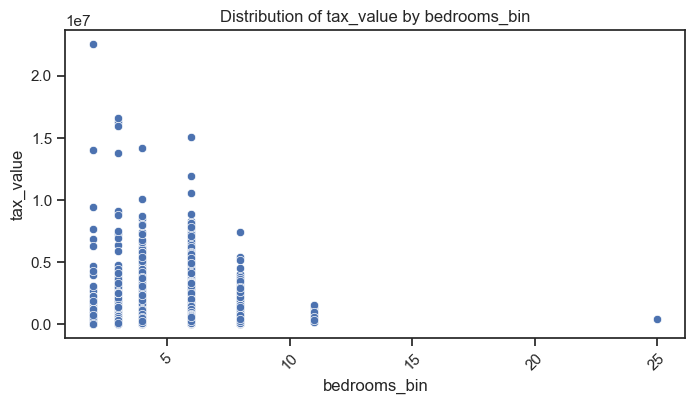

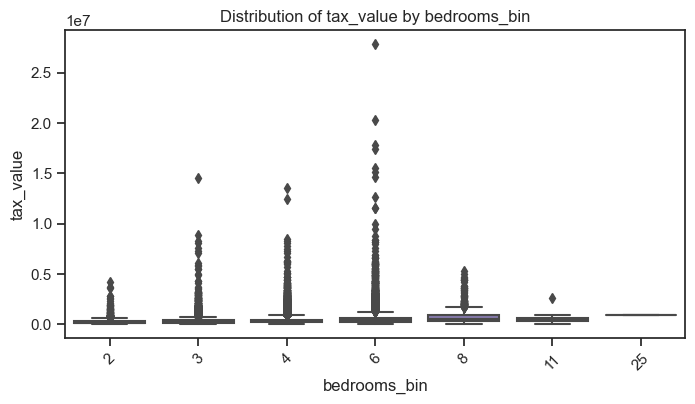

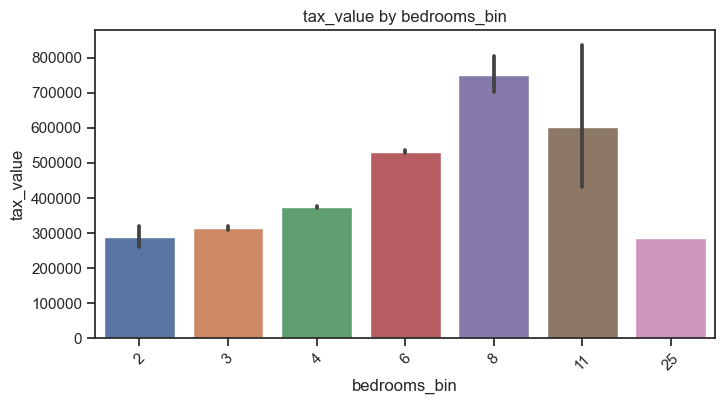

In [5]:
#Calling the plot_categorical_and_continuous_vars function to visualize the relationship betweem b and tax_value
plot_categorical_and_continuous_vars(train, categorical_col = 'bedrooms_bin', continuous_col = 'tax_value')

### 7) 
Come up with some initial hypotheses based on your goal of predicting property value.

### 8) 
Visualize all combinations of variables in some way.

### 9) 
Run the appropriate statistical tests where needed.

### 1st Hypothesis

#### Does tax amount affect tax value?

Null hypothesis: Tax amount does not have a relationship with tax value.  
Alternative hypothesis: Tax amount has a direct relationship with tax value.

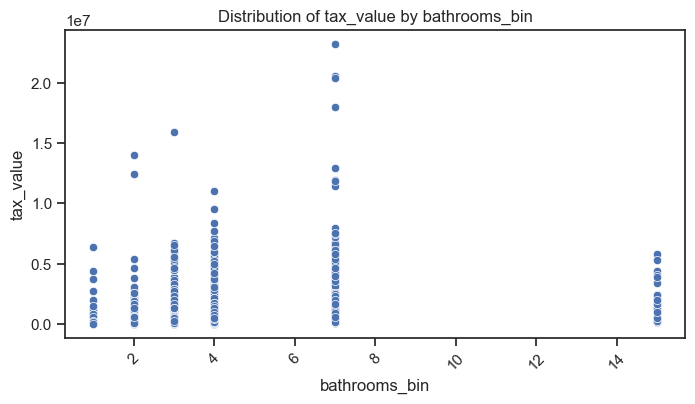

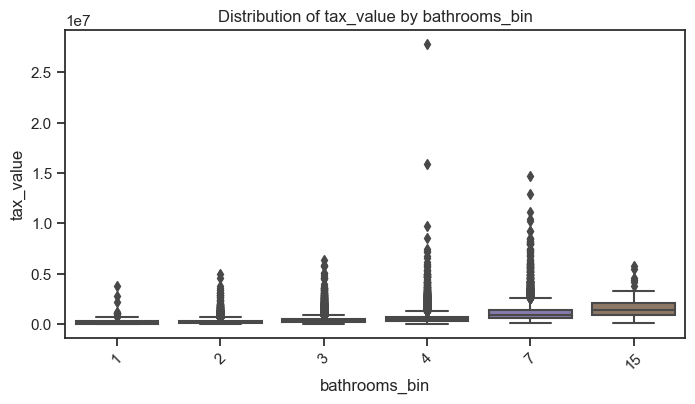

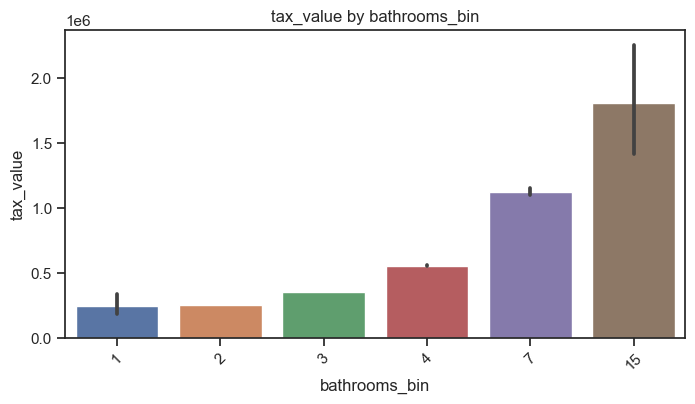

In [6]:
#Calling the plot_categorical_and_continuous_vars function to visualize the relationship betweem bathrooms and tax_value
plot_categorical_and_continuous_vars(train, categorical_col = 'bathrooms_bin', continuous_col = 'tax_value')

From the relplot we can judge that tax_amount has a relationship with tax_value.

#### Performing a spearmanr test for the two continuous columns.

In [7]:
r, p = stats.spearmanr(train.bathrooms, train.tax_value)
r, p

(0.4356952332581925, 0.0)

In [8]:
#Calling the hypothesis_test function to test the value of p
hypothesis_test(p)

we reject the null, there is a relationship.


The r value indicates a moderate positive monotonic relationship between the two variables while the p value suggests that the observed correlation is statistically significant.

### 2nd Hypothesis

#### Does the number of bedrooms affect the number of bathrooms?

Null hypothesis: The number of bedroom has no relationship with the number of bathroom.  
Alternative hypothesis: The number of bedroom has a direct relationship with the number of bathroom.

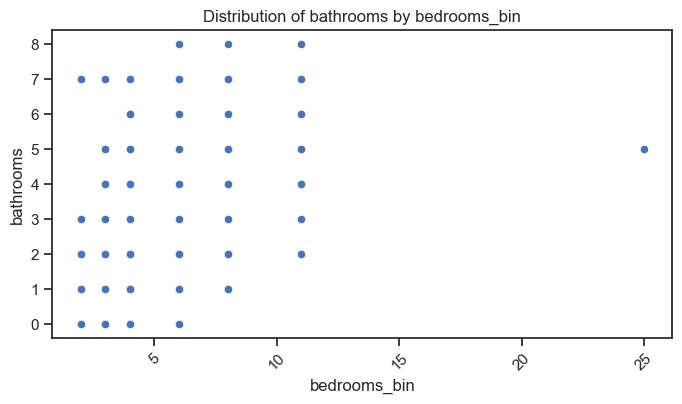

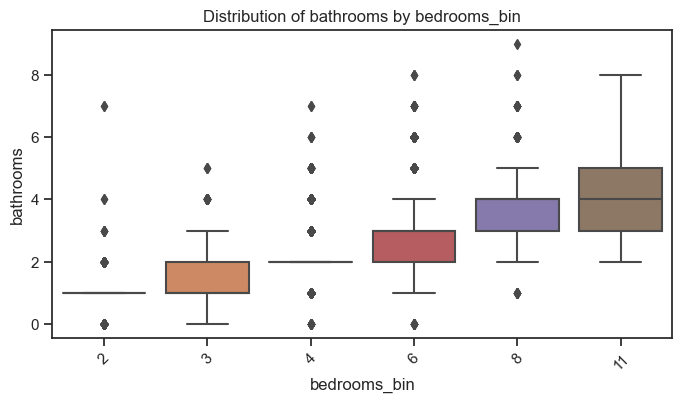

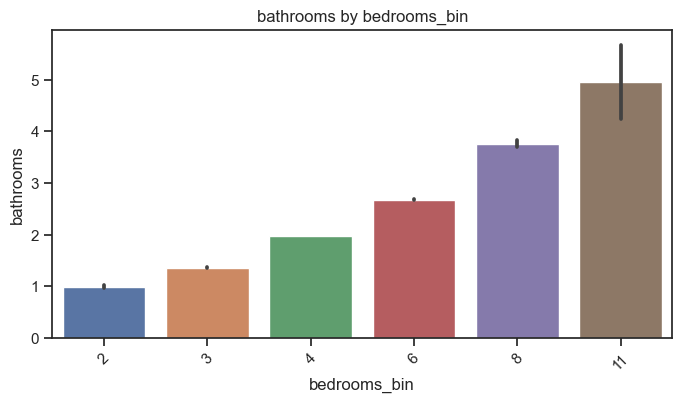

In [9]:
#Calling the plot_categorical_and_continuous_vars function to visualize the relationship betweem bedrooms and tax_value
plot_categorical_and_continuous_vars(train, categorical_col = 'bedrooms_bin', continuous_col = 'bathrooms')

From the plots above there seems to be a relationship between the number of bedrooms and the number of bathrooms.

#### Performing a pearsonr test on the two continuous columns

In [10]:
#performing a pearsonr to test the correlation between bedrooms and tax_value
correlation, p = stats.pearsonr(train['bedrooms'], train['bathrooms'])
correlation, p

(0.6143901724623196, 0.0)

In [11]:
#Calling the hypothesis_test function to test the value of p
hypothesis_test(p)

we reject the null, there is a relationship.


The correlation value suggests a moderate positive linear relationship between the two variables while the p value suggests that the observed correlation is statistically significant.

### 3rd Hypothesis

#### Does fips affect tax_value

Null hypothesis: Fips does not have a relationship with tax_value.  
Alternative hypothesis: Fips does have a relationship with tax_value.

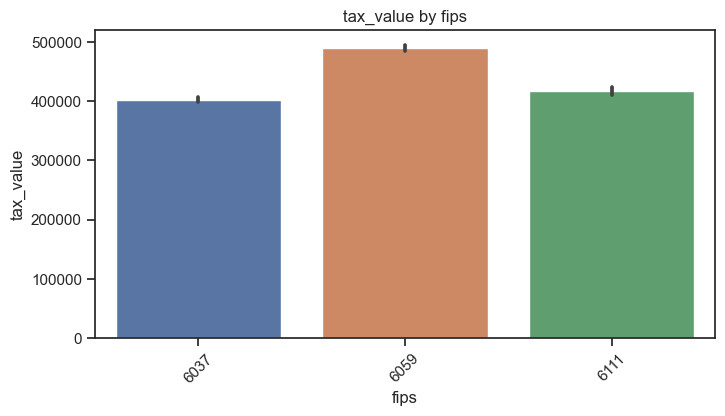

In [12]:
#Creating a barplot to visualize the relationship between fips and tax_value
different_plots(train, 'fips', 'tax_value', 'bar')

From the barplot, there is not clear indication that fips has a direct relationship with tax_value.

#### Performing an anova test between one categorical and one continuous columns

In [13]:
# Separate tax_value by the three fips categories
fips_6037 = df['tax_value'][df['fips'] == 6037]
fips_6111 = df['tax_value'][df['fips'] == 6111]
fips_6059 = df['tax_value'][df['fips'] == 6059]

# Perform one-way ANOVA
f, p = stats.f_oneway(fips_6037, fips_6111, fips_6059)
f, p

(8554.082613936247, 0.0)

In [14]:
hypothesis_test(p)

we reject the null, there is a relationship.


The extremely low p value suggests that there is a significant difference in the mean tax values among the three categories of the fips.

### 4th hypothesis

#### Does squarefeet affect tax_value?

Null hypothesis: Squarefeet has no relation with tax_value.  
Alternative hypothesis: Squarefeet is related with tax value.

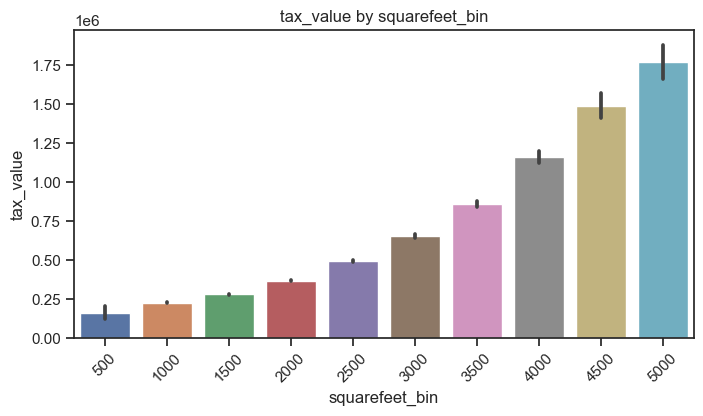

In [15]:
different_plots(train, 'squarefeet_bin', 'tax_value', 'bar')

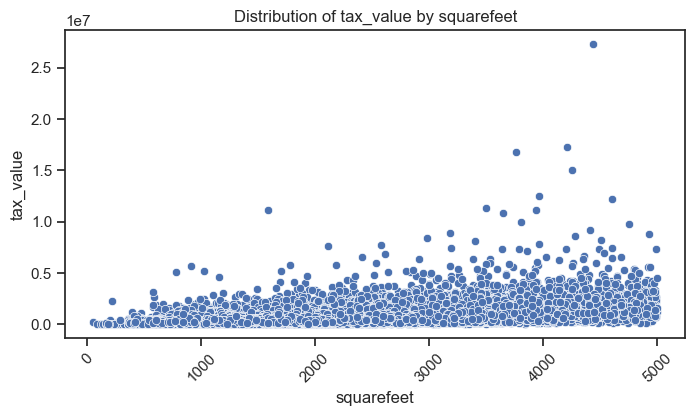

In [28]:
different_plots(train, 'squarefeet', 'tax_value', 'scatter')

From the scatter plot there is no clear indication that squarefeet has a direct effect on tax_value.

#### Performing a spearmanr test for the two continuous columns

In [17]:
r, p = stats.spearmanr(train.squarefeet, train.tax_value)
r, p

(0.50621655013458, 0.0)

In [18]:
hypothesis_test(p)

we reject the null, there is a relationship.


The r value indicates a moderate positive monotonic relationship between the two variables while the p value suggests that the observed correlation is statistically significant.

### 5th hypothesis

#### Does the number of bedrooms affect tax_value?

Null hypothesis: The number of bedrooms has no relation to tax_value.  
Alternative hypothesis: The number of bedrooms has a direct relation to tax_value.

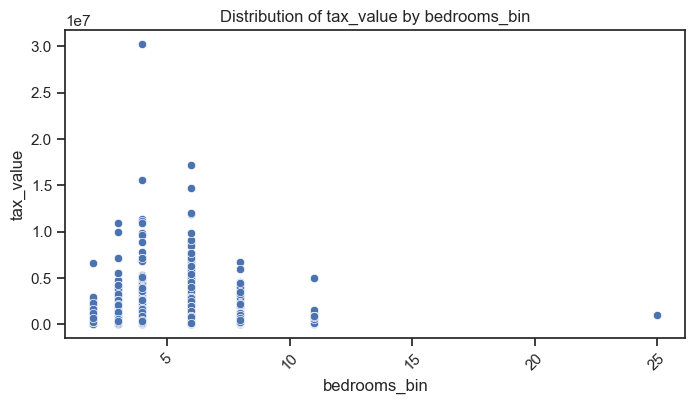

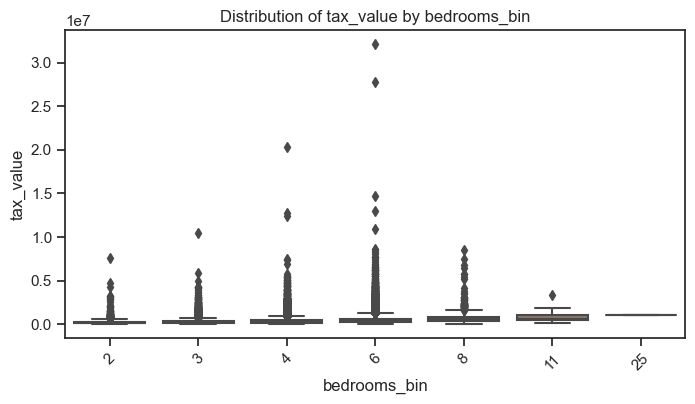

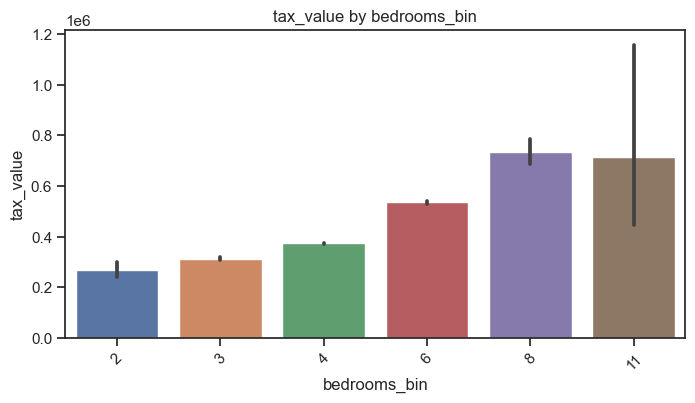

In [30]:
plot_categorical_and_continuous_vars(train, 'bedrooms_bin', 'tax_value')

#### Performing a spearmanr test for the two continuous columns

In [20]:
r, p = stats.spearmanr(train.bathrooms, train.tax_value)
r, p

(0.4356952332581925, 0.0)

In [21]:
hypothesis_test(p)

we reject the null, there is a relationship.


The r value indicates a moderate positive monotonic relationship between the two variables while the p value suggests that the observed correlation is statistically significant.

### 10) 
What independent variables are correlated with the dependent variable, home value?

Ans => From all the hypothesis tests above the following indeoendent variable are correlated with home value.

0) Bathroom
0) sqaurefeet
0) bathrooms

### 11) 
Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet

Ans => From the visaulization and statistical test done in my second hypothesis, there seems to be a relationship between the number of bedrooms and the number of bathrooms.

### 12) 
Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13) 
Explore your dataset with any other visualizations you think will be helpful.

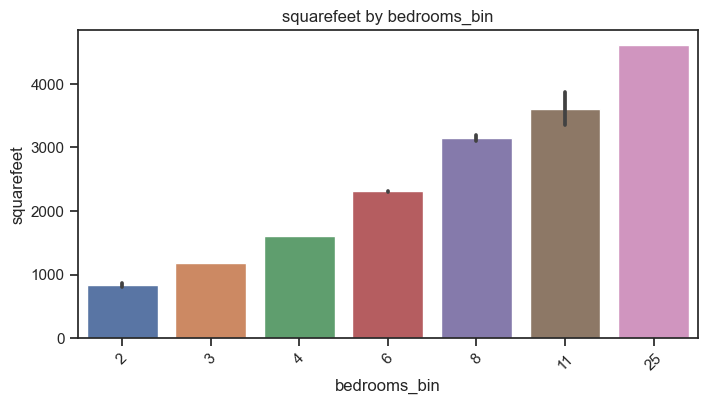

In [22]:
different_plots(train, 'bedrooms_bin', 'squarefeet', 'bar')

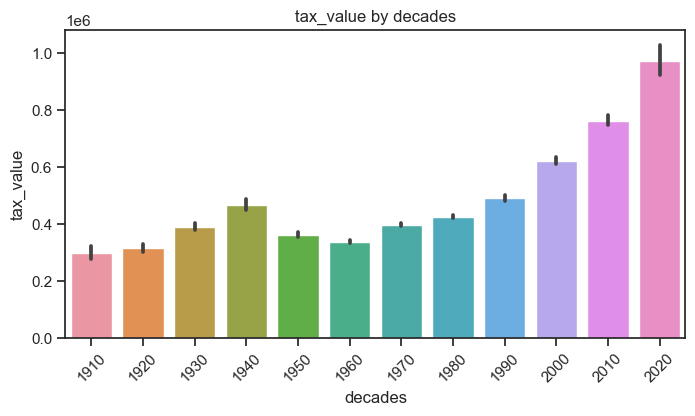

In [23]:
different_plots(train, 'decades', 'tax_value', 'bar')

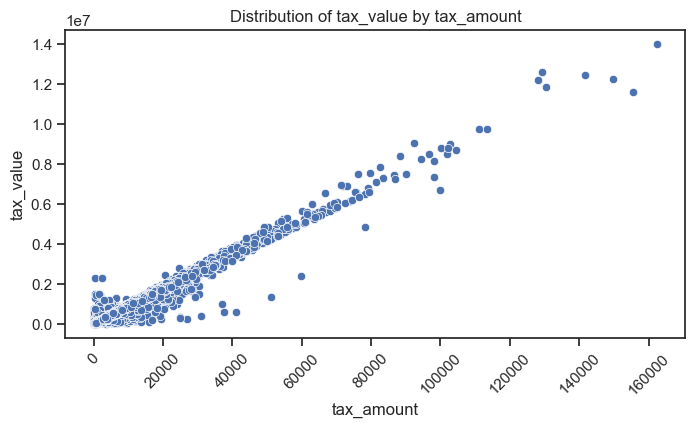

In [36]:
different_plots(train, 'tax_amount', 'tax_value', 'scatter')gi